In [54]:
# importing libraries for DA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [62]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [6]:
notebook_path = os.getcwd()
print(notebook_path)

/Users/diana/Pandas-Data-Science-Tasks


**1.Для начала смёрджим данные за все месяцы в один датасет.**

In [7]:
# importing libraries
import glob
import os

# merging the files
joined_files = os.path.join('/Users/diana/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data', 'Sales*.csv')

# A list of all joined files is returned
joined_list = glob.glob(joined_files)

# Finally, the files are joined
sales = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


**2. Давайте приступать к анализу наших данных. Какой месяц лидирует по продажам? Сколько было продано в этот месяц?**

Для этого нам было бы удобнее всего вынести месяцы в отдельную колонку, чтобы было проще группировать данные.
Проверим типы данных и в случае необходимости приведем колонку с датой в формат datetime.

In [8]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')

Когда у нас колонка приведена к нужному формату, можем взять из даты месяц.

In [10]:
sales['months'] = pd.to_datetime(sales['Order Date'], format='%m').dt.month_name()

In [11]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December


In [12]:
sales = sales.dropna()

Теперь хорошо было бы создать колонку с рассчитанной финальной стоимостью приобретённого товара. Это актуально, так как в датасете помимо цены есть колонка с количеством товара.

In [13]:
sales = sales.astype({'Quantity Ordered':'int','Price Each':'float'})

In [14]:
sales = sales.assign(total_sum=lambda x: (x['Price Each'] * x['Quantity Ordered']))

In [15]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,total_sum
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95


In [16]:
most_profitable_month = sales.groupby('months').agg({'total_sum':'sum'}).reset_index().sort_values(by = 'total_sum', ascending = False)
most_profitable_month

,months,total_sum
2,December,4.613443e+06
10,October,3.736727e+06
0,April,3.390670e+06
9,November,3.199603e+06
8,May,3.152607e+06
7,March,2.807100e+06
5,July,2.647776e+06
6,June,2.577802e+06
1,August,2.244468e+06
3,February,2.202022e+06


Значений не так много и мы даже по табличным данным можем увидеть месяц, который лидирует по продажам. Но все же для наглядности неплохо бы построить график. Что мы и сделаем. Работать будем с библиотекой seaborn.

[Text(0.5, 1.0, 'Sales by month')]

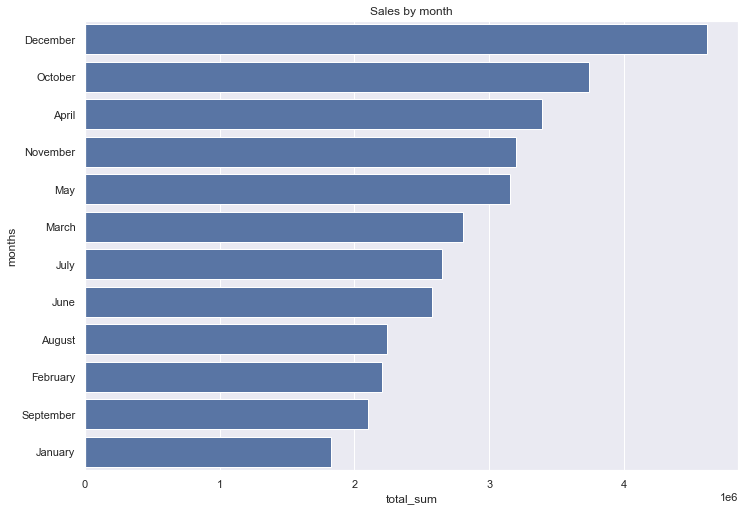

In [65]:
sns.set_theme(style='darkgrid')
sns.barplot(x='total_sum', y='months', data=most_profitable_month, color='b').set(title='Sales by month')

Отлично. На первый вопрос ответ нашли. Можем двигаться 

**2. Какой город лидирует по количеству заказов?**

Итак, для ответа на этот вопрос нам необходимо сгруппировать наши данные по городу и посчитать кол-во заказов. Город мы можем взять из колонки с адресом отправки. Для этого воспользуемся строковым методом split, затем возьмем второй элемент нашего списка, который получился в результате прменения split. Таким образом создадим новую колонку с городом.

In [18]:
sales['city'] = sales['Purchase Address'].str.split(', ')
sales['city'] = sales['city'].apply(lambda x: x[1])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,total_sum,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta


In [19]:
city_sales = sales.groupby('city').agg({'Order ID':'count'}).reset_index().sort_values(by = 'Order ID', ascending = False)
city_sales

,city,Order ID
7,San Francisco,44732
4,Los Angeles,29605
5,New York City,24876
2,Boston,19934
0,Atlanta,14881
3,Dallas,14820
8,Seattle,14732
6,Portland,12465
1,Austin,9905


В данном случае визуализировать результат необязательно. Все и так хорошо видно.

**3.В какое время лучше всего показывтаь рекламу покупателям, чтобы они вероятнее всего сделалии заказ?**

In [20]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,total_sum,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta


Чтобы ответить на этот вопрос, как и в предыдущих случаях, было бы удобно вычленить час из колонки с датой и временем, чтобы проанализировать распределение количества покупок в течение суток. Давайте же сделаем это.

In [21]:
sales['hours'] = sales['Order Date'].dt.hour

Для более удобного восприятия лучше заменить "0", который обозначает полночь или 12am на 24.

In [22]:
sales['hours'] = sales['hours'].replace(0, 24)

In [23]:
hours_sales = sales.groupby('hours').agg({'Order ID':'count'}).reset_index().sort_values(by = 'Order ID', ascending = False)
hours_sales

,hours,Order ID
18,19,12905
11,12,12587
10,11,12411
17,18,12280
19,20,12228
12,13,12129
13,14,10984
9,10,10944
20,21,10921
16,17,10899


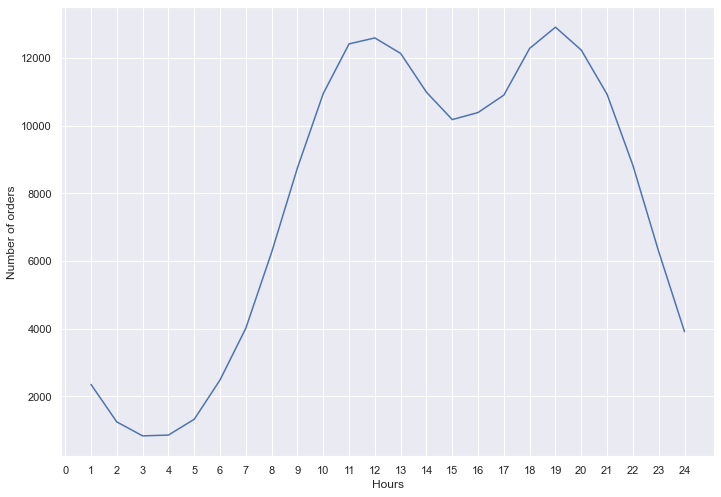

In [64]:
sns.set_theme(style='darkgrid')
ax = sns.lineplot(x='hours', y='Order ID',
             data=hours_sales)
ax.set(xlabel='Hours', ylabel='Number of orders')
ax.set_xticks(range(len(hours_sales)+1))
#ax.set_ticklabels(ticklabels=range(1, 25))

Судя по графику, мы можем сделать вывод о том, что пик заказов приходится на два временных отрезка в течение суток: это утром с 12 до 13 и вечером 19 до 21. Соответственно, мы можем предложить транслировать рекламу за час-полтора до вышеобозначенных временных промежутков.

**4. Какие товары чаще всего продаются вместе?**

In [34]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,total_sum,city,hours
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,24
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12


Для решения данной задачи было бы удобно воспользоваться чем-то типа array_agg в PostgreSQL. Для этого сгруппируем наши данные по айди заказа и преобразуем товары из этого заказа в список.

In [35]:
set_per_order = sales.groupby('Order ID')['Product'].apply(list).reset_index(name='products')
set_per_order.head()

,Order ID,products
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]


Теперь имеет смысл как-то отфильтровать только те заказы, которые содержат в себе два и более товара.

In [36]:
set_per_order['pair_or_more'] = set_per_order['products'].apply(lambda x: 'yes' if len(x) >= 2 else 'no')

In [37]:
set_per_order = set_per_order[set_per_order['pair_or_more'] == 'yes']

In [38]:
set_per_order['products'] = [', '.join(map(str, l)) for l in set_per_order['products']]
set_per_order = set_per_order.drop('pair_or_more', axis=1)
set_per_order

,Order ID,products
41,141275,"USB-C Charging Cable, Wired Headphones"
56,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
131,141365,"Vareebadd Phone, Wired Headphones"
150,141384,"Google Phone, USB-C Charging Cable"
216,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
178302,319536,"Macbook Pro Laptop, Wired Headphones"
178322,319556,"Google Phone, Wired Headphones"
178350,319584,"iPhone, Wired Headphones"
178362,319596,"iPhone, Lightning Charging Cable"


Для дальнейших манипуляций нам понадобятся библиотеки itertools и collections.

In [39]:
#https://stackoverflow.com/questions/62038142/counting-the-number-of-pairs-of-items-in-a-grouped-dataframes-column-pandas
from itertools import combinations
from collections import Counter

In [40]:
c = Counter()
for product in set_per_order['products']:
  row_list = product.split(', ')
  c.update(Counter(combinations(row_list, 2)))

c.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Итак, самыми продаваемыми товарами в паре оказались: айфон и кабель лайтнинг к нему. Как можно использовать данную информацию? Возможно, это будет полезно узнать маркетологам для генерации каких-то специальных предложений, чтобы привлечь покупателей.

**5. Какой продукт продается чаще всего? Привести доводы, почему он продается чаще.** 

In [41]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,total_sum,city,hours
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,24
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12


In [56]:
most_popular_product = sales.groupby('Product', as_index=False).agg({'Quantity Ordered':'sum'})
most_popular_product

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


Итак, судя по результату, самым продаваемым продуктом является ААА-батарейки. Если подумать, почему батарейки самые многочисленные по продажам, можно предположить, что скорее всего они являются самым дешевым товаром, поэтому их чаще покупают. Давайте проверим эту гипотезу построив график, на котором отразим количество проданных товаров и одновременно среднюю стоимость товаров.

<AxesSubplot:label='a4a44c22-b079-4358-bbfe-d9c80c5c0c10', ylabel='Price Each'>

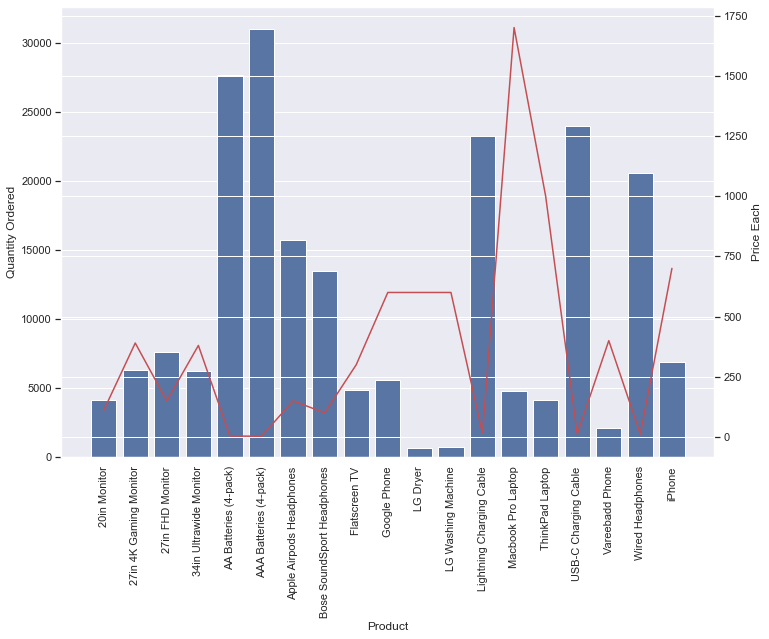

In [63]:
sns.set_theme(style='darkgrid')
ax = sns.barplot(x = most_popular_product['Product'], y = most_popular_product['Quantity Ordered'], color='b')
ax.tick_params(axis='x', rotation=90)

mean_prices = sales.groupby('Product').agg({'Price Each':'mean'}).reset_index()
ax2 = plt.twinx()
sns.lineplot(data=mean_prices['Price Each'], color='r', ax=ax2)

Итог: наша гипотеза подтвердилась. Действительно, чем ниже цена товара, тем более активно его приобретают.